In [2]:
import cbpro
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
EXCHANGE = 'CBPro'
TICKER = 'ADA-USD'
public_client = cbpro.PublicClient()

def get_order_book(TICKER='BTC-USD', level=2):
    TIME = public_client.get_time()
    order_book = public_client.get_product_order_book(TICKER, level=2)
    return order_book, TIME

order_book, TIME = get_order_book(TICKER=TICKER, level=2)

In [9]:
DEPTH = 400
order_book_bids = np.array(order_book['bids']).astype(float)
buy_prices = order_book_bids[:, 0][:DEPTH]
buy_volumes = order_book_bids[:, 1][:DEPTH]

order_book_asks = np.array(order_book['asks']).astype(float)
sell_prices = order_book_asks[:, 0][:DEPTH]
sell_volumes = order_book_asks[:, 1][:DEPTH]

Text(0, 0.5, 'Amount')

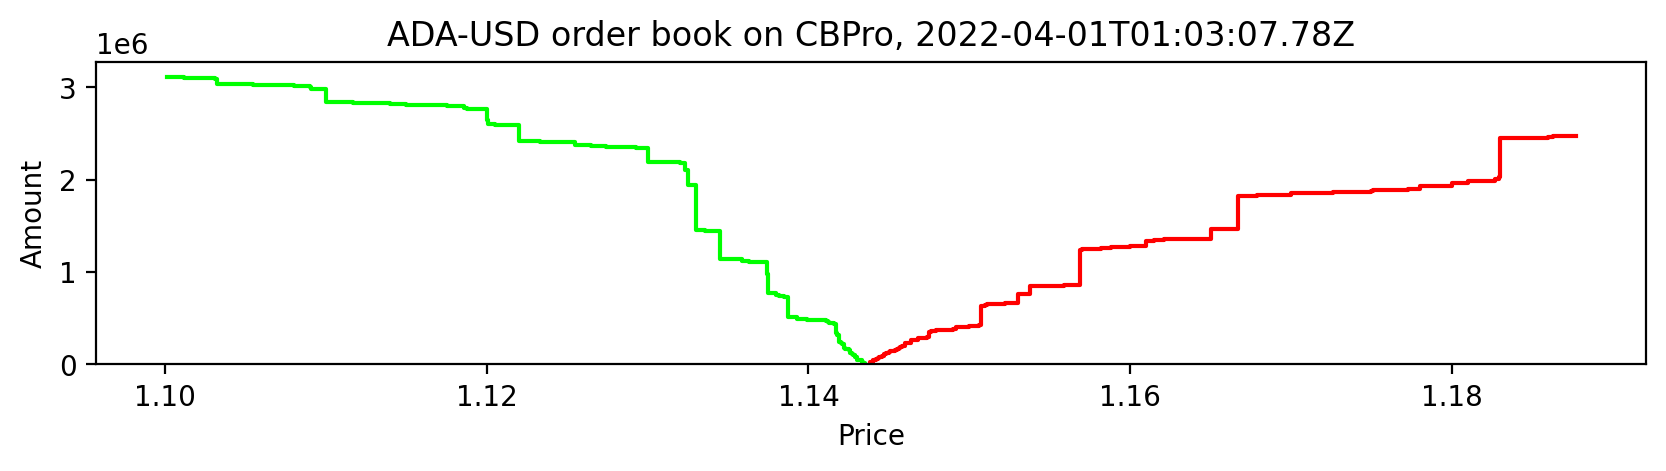

In [10]:
fig, ax = plt.subplots(figsize=(10, 2), dpi=200)
ax.set_title(str(TICKER) + ' ' + 'order book on' + ' '+ str(EXCHANGE) +', '+str(TIME['iso']))
sns.ecdfplot(x=buy_prices, weights=buy_volumes, stat="count", complementary=True, ax=ax, color='lime')
sns.ecdfplot(x=sell_prices, weights=sell_volumes, stat="count", ax=ax, color='red')
ax.set_xlabel("Price")
ax.set_ylabel("Amount")

In [11]:
public_client.get_product_historic_rates("BTC-USD")

[[1648774860, 45485.51, 45500.71, 45495.55, 45493.33, 1.33017827],
 [1648774800, 45493.87, 45549.49, 45549.49, 45495.51, 11.01846944],
 [1648774740, 45481.19, 45577.28, 45484.7, 45552.88, 17.87008723],
 [1648774680, 45480.52, 45521.59, 45492.3, 45484.72, 7.40112823],
 [1648774620, 45480.14, 45529.15, 45527.73, 45493.07, 18.88023935],
 [1648774560, 45527.71, 45555.02, 45552.6, 45527.71, 5.01367229],
 [1648774500, 45505.98, 45590.28, 45564.4, 45552.61, 14.95299132],
 [1648774440, 45549.42, 45625.85, 45594.55, 45562.64, 16.92028397],
 [1648774380, 45594.2, 45618.76, 45612.71, 45594.55, 4.28445344],
 [1648774320, 45606.07, 45620.21, 45620.21, 45610.65, 4.42767943],
 [1648774260, 45603.25, 45646.38, 45646.38, 45620.21, 5.26117294],
 [1648774200, 45640.12, 45652.34, 45642.77, 45646.44, 4.04439005],
 [1648774140, 45600, 45655.42, 45611.58, 45640.06, 8.65321368],
 [1648774080, 45611.11, 45631.72, 45625.09, 45611.58, 7.93399389],
 [1648774020, 45612.76, 45649.51, 45628.3, 45625.1, 10.62815649],